# **1.- Modelo de Regression Lineal**

**Introducción**

Para trabajar en estos conceptos, utlizaremos el dataset [Resistencia del Hormigon](https://www.kaggle.com/datasets/maajdl/yeh-concret-data/) que utlizaremos para nuestro modelo.

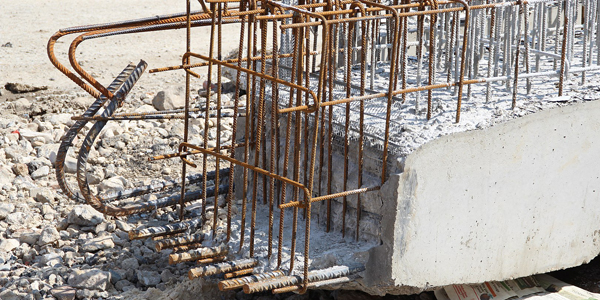

**Acerca del conjunto de datos**

**Contexto**

**Resumen**
El hormigon es el material más importante en la ingenieria civil.

La resistencia a la compresión es una función alatamente no lineal de la edad y los ingredientes.

**Contenido**

**Conjunto de datos de resistencia a la compresión del hormigon**

**Información del conjunto de datos:**

Número de instancias: 1030
Número de atributos: 9
Valores de atributos faltantes: Ninguno

**Información de atributos**
Se proporcionan el nombre de la variable, el tipo de variable, la unidad de medida y una breve descripción. La resistencia a la compresión del hormigón es el problema de regresión. El orden de este listado corresponde al orden de los números a lo largo de las filas de la base de datos.

*Nombre - Tipo de datos - Medición*

* Cemento  -- cuantitativo -- kg en una mezcla de m3 
* Escoria de alto horno  -- cuantitativa -- kg en una mezcla de m3 
* Cenizas volantes  -- cuantitativa - - kg en m3 de mezcla 
* Agua -- cuantitativo - kg en m3 de mezcla 
* Superplastificante  - cuantitativa - kg en m3 de mezcla 
* Agregado Grueso -- cuantitativo -- kg en una mezcla de m3 
* Agregado fino -- cuantitativo -- kg en una mezcla de m3 
* Edad -- cuantitativa -- Día (1~365) 
* Resistencia a la compresión del hormigón -- cuantitativa -- MPa 

Primero importemos nuestra librerias

In [67]:
import numpy as np
from scipy.stats import norm 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Ahora carguemos nuestro dataset a aplicar

In [68]:
hormigon = pd.read_csv('https://raw.githubusercontent.com/llanosrenzo/MachineLearning/main/Regresion/Concrete_Data_Yeh.csv',sep = ';', )
hormigon

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


Observemos las columnas, tipo de datos y datos nulos

In [69]:
hormigon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [70]:
hormigon.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Analizemos la relacion lineal de nuestras variables indenpientes o regresoras con respecto a la variable respuesta o dependiente

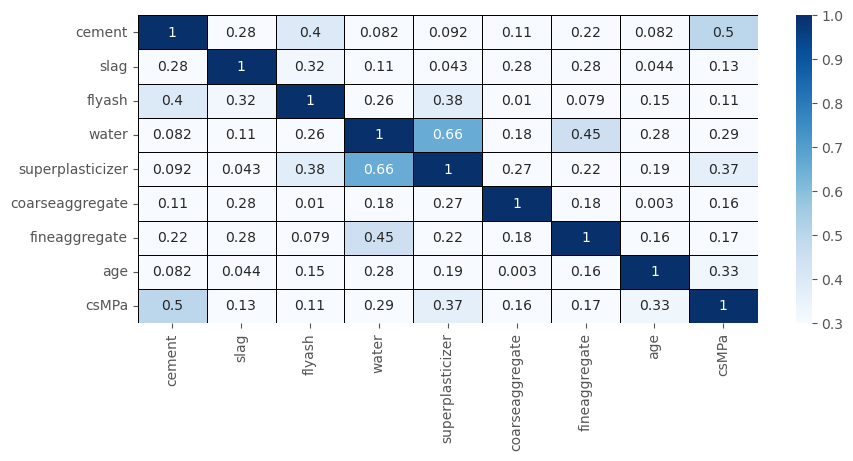

In [71]:
fig , ax = plt.subplots(figsize = (10,4))
sns.heatmap(hormigon.corr().abs(),annot=True,cmap = 'Blues',
            vmin = 0.3,vmax = 1,
            linewidths = 0.5,linecolor = 'black',
            cbar = True)
plt.show()

De acuerdo al grafico anterior, observamos que la variable cemento(cement)  tiene la mayor correlacion con la variable respuesta.

https://python-charts.com/es/correlacion/pairplot-seaborn/

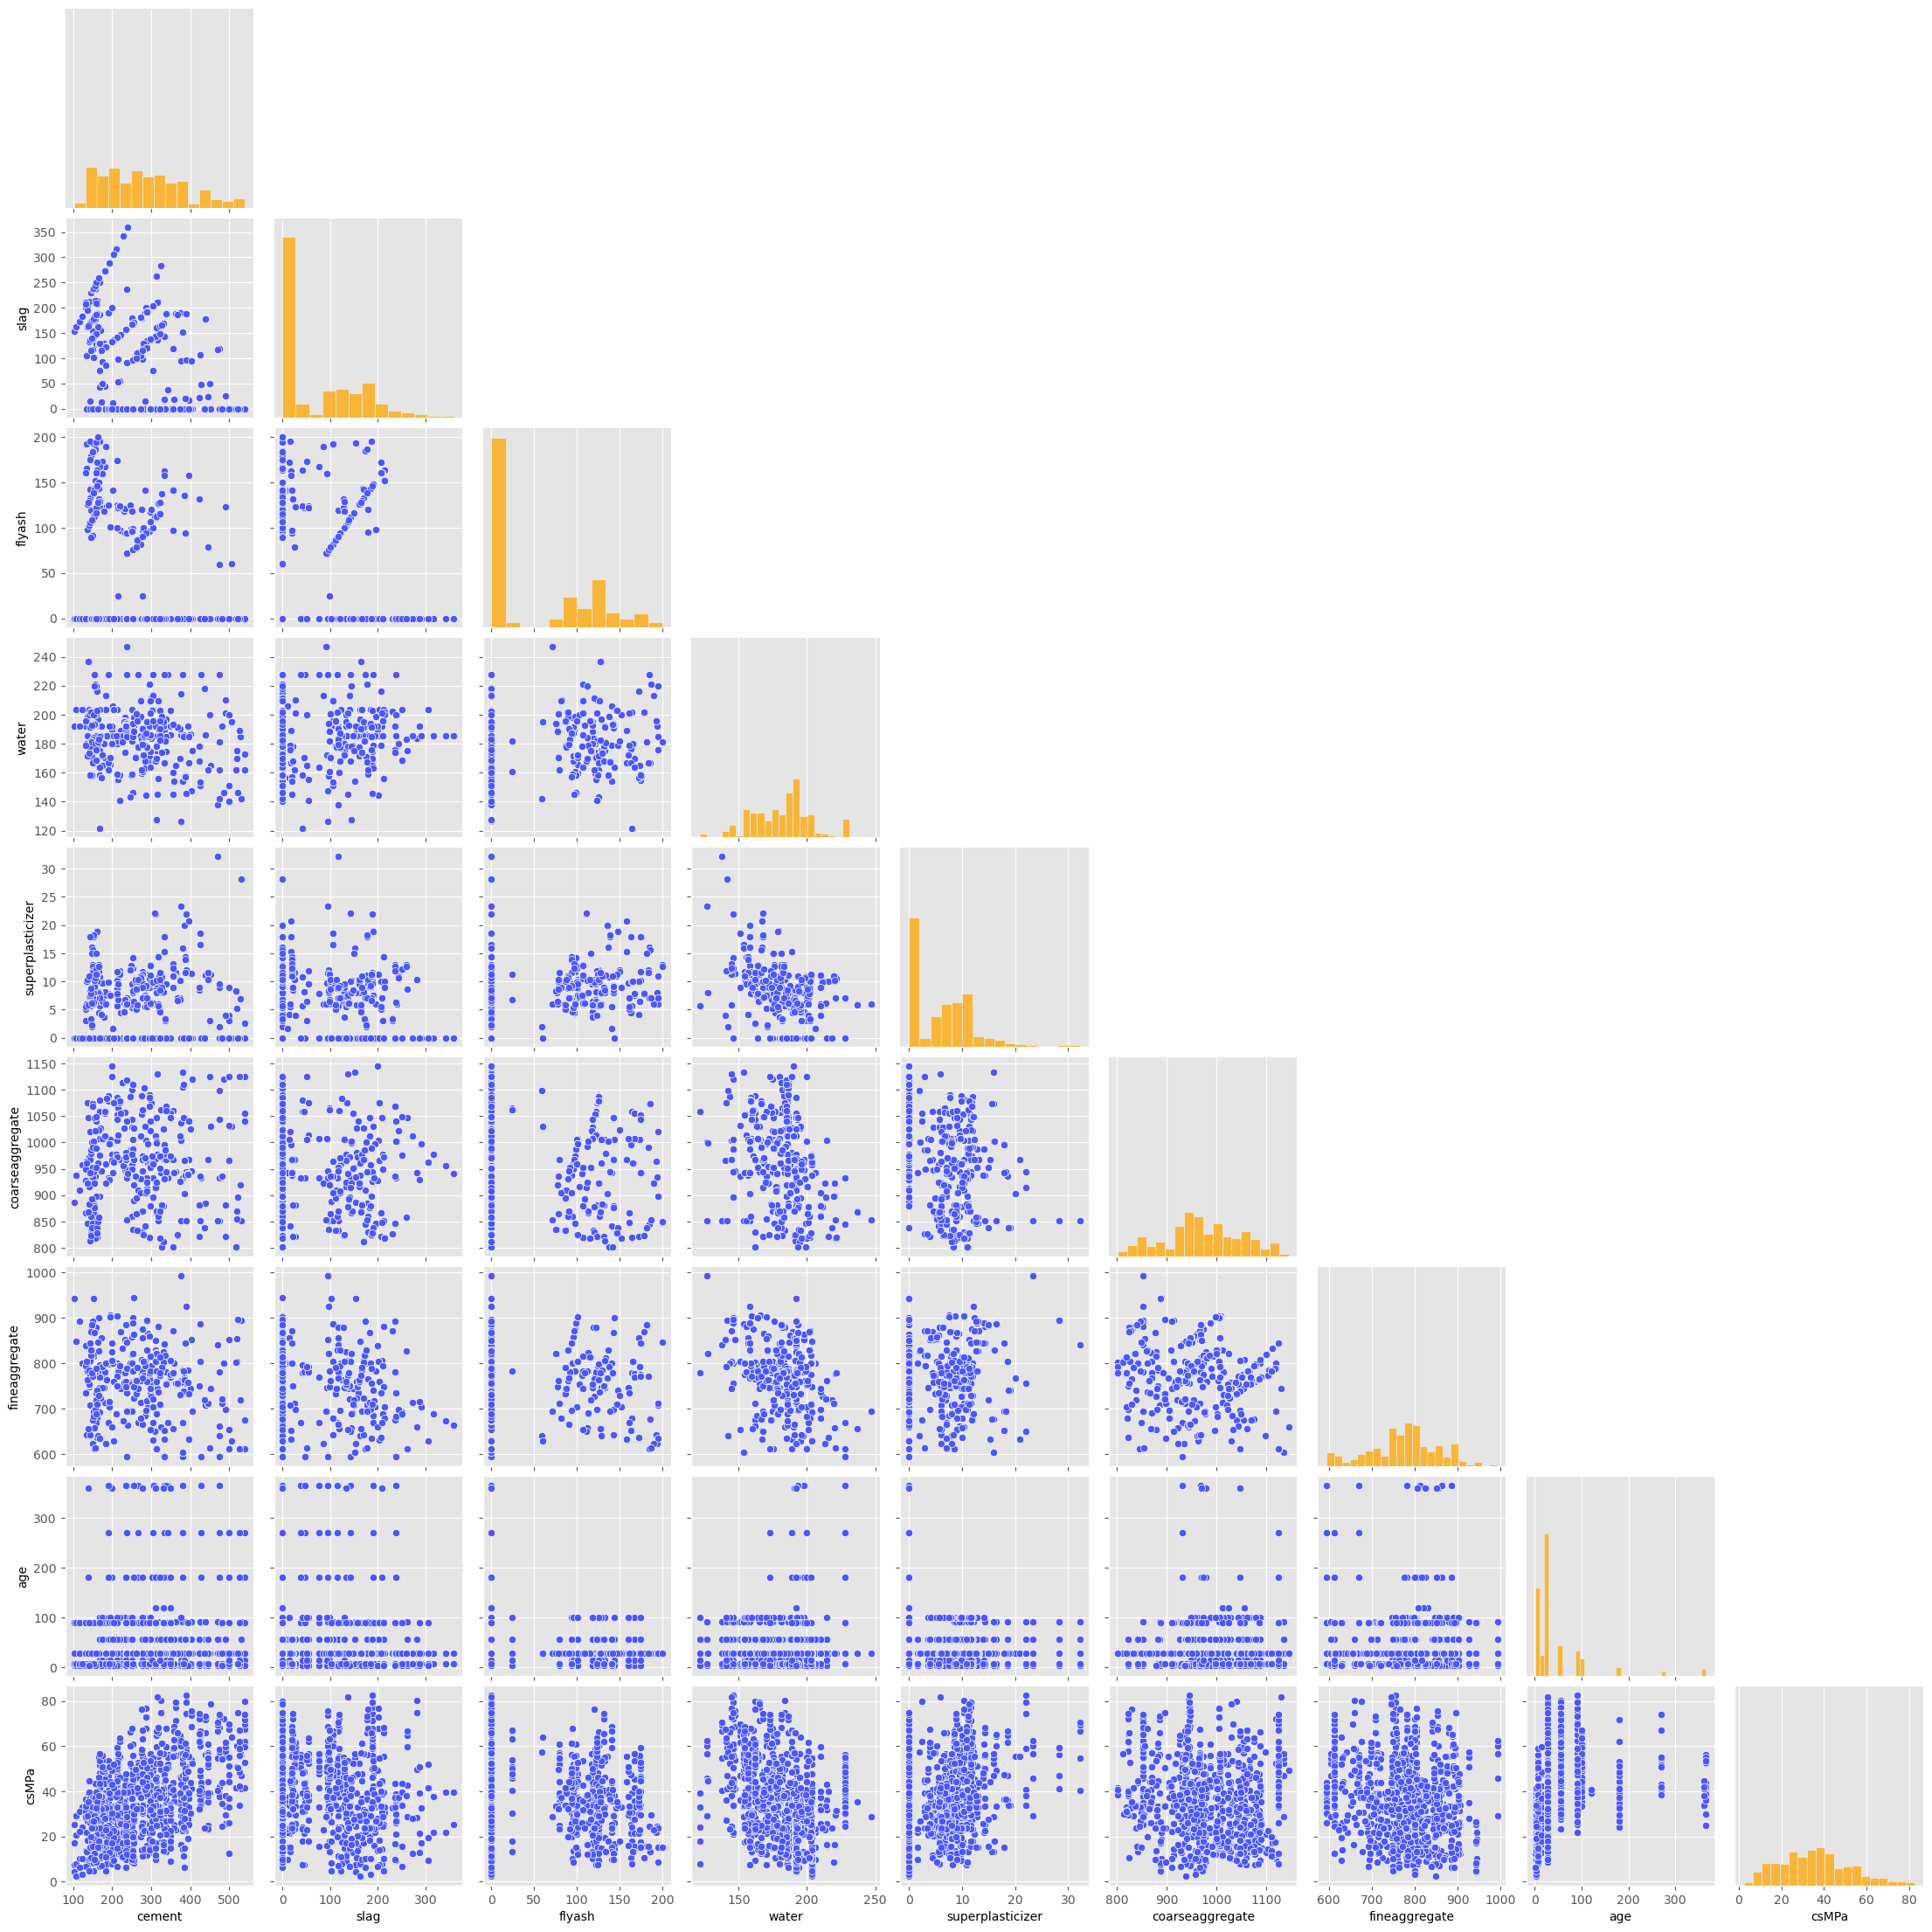

In [72]:
sns.pairplot(hormigon,
             plot_kws = {'color':'#4B57FA','marker':'o'},# Modificar los estilos de los graficos de los paneles inferior y superior
             diag_kws = {'color':'orange'}, # Personalizar el estilo de la diagonal
            corner = True) # Elimina el panel supèrior
plt.show()

Nos muestra una mayor informacion  y visualizacion con respecto a la matriz de correlaciòn, donde las variables cemento y resitencia a la compresion de hormigon nos muestra una posible relacion lineal.

Para observarlo más facilmente, grafiquemos al cemento en nuestro eje $x$ *(valor predictor o valor independiente)* y la resistencia a la compresion de hormigon  $y$ *(valor a predecir o valor dependiente)*.

$$ y = \beta_0 + \beta_1x$$

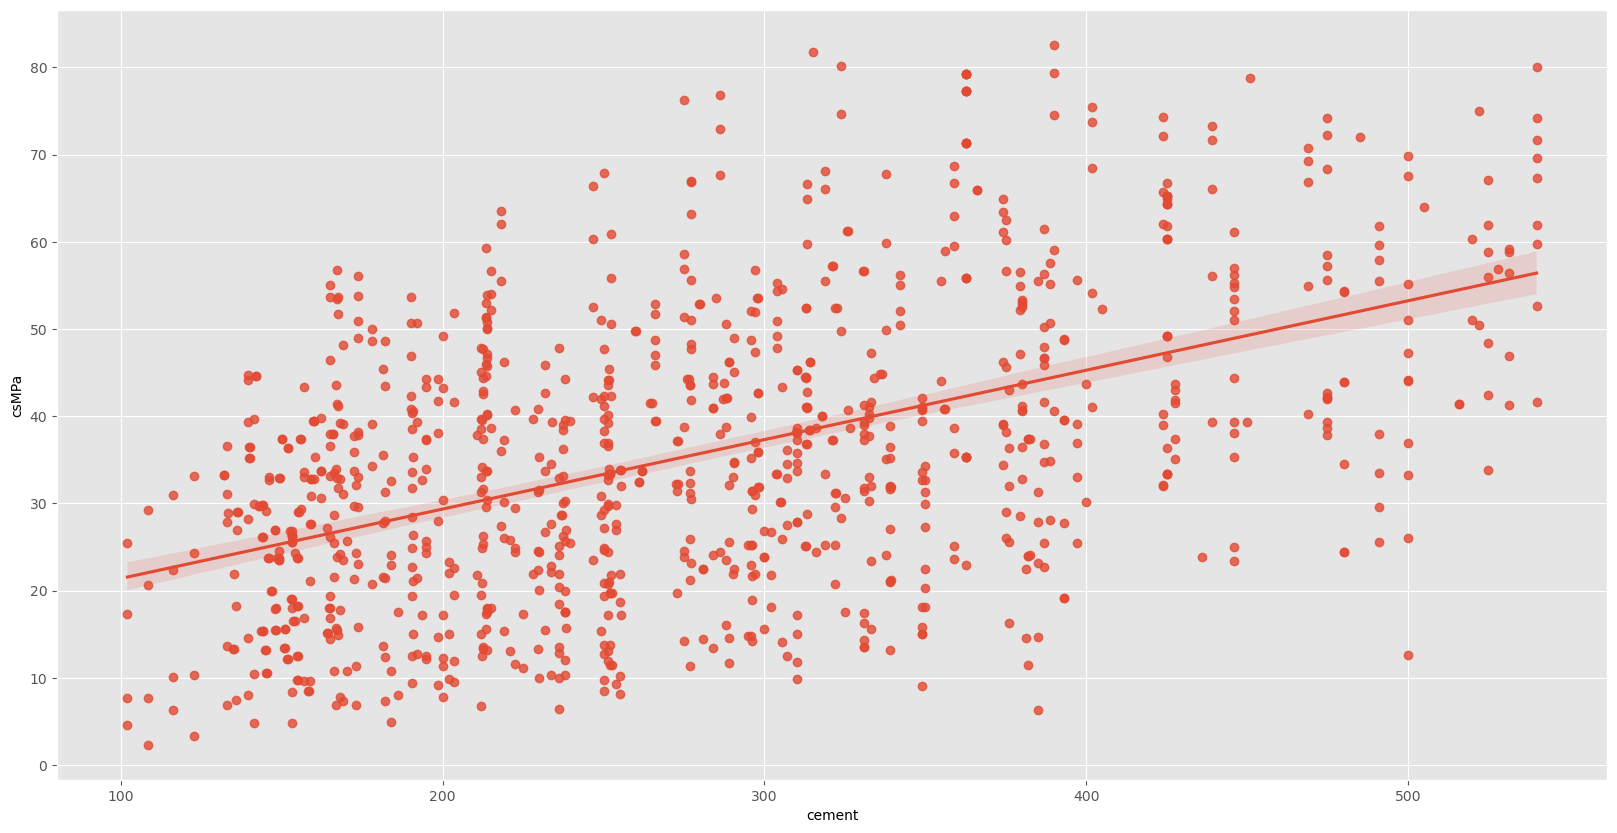

In [73]:
sns.regplot(x = hormigon['cement'],y= hormigon['csMPa'])
plt.show()